In [1]:
import pandas as pd
import os
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '../Data_extraction/'
csv_file = 'extracted_data_v1.csv'
filepath = os.path.join(data_dir, csv_file)
df = pd.read_csv(filepath)

In [3]:
def run_regression(df:pd.DataFrame, columns:list):
    assert isinstance(df, pd.DataFrame)
    assert isinstance(columns, list)
    if len(columns) > 0:
        keys = df.keys()
        assert all(c in keys for c in columns)
        
    df_subset = df
    if len(columns) > 0:
        df_subset = df[columns]
    dataset = np.asarray(df_subset, dtype='int32')
    np.random.seed(0)
    np.random.shuffle(dataset)
    features = dataset[:,:-1]
    labels = dataset[:,-1].reshape((len(dataset),-1))
    train_features = features[:8000]
    train_labels = labels[:8000]
    test_features = features[8000:]
    test_labels = labels[8000:]
    model = linear_model.LinearRegression()
    model.fit(train_features, train_labels)
    predictions = model.predict(test_features)
    return mean_absolute_error(predictions, test_labels)

In [4]:
feature_groups = [
    ['Vehicle Monthly Distance Km', 'diesel', 'electric', 'hybrid', 'lpg', 'petrol', 'CarbonEmission'],
    ['Frequency of Traveling by Air', 'CarbonEmission'],
    ['extra large waste bag', 'large waste bag', 'medium waste bag', 'small waste bag', 'Waste Bag Weekly Count', 'CarbonEmission'],
    ['private', 'public', 'walk/bicycle', 'CarbonEmission'],
    ['coal', 'electricity', 'natural gas', 'CarbonEmission'],
    []
]
names = [
    'vehicle distance\nengine type',
    'air travel',
    'waste bag size\nwaste bag count',
    'commute method',
    'heating source',
    'combined'
]

In [5]:
# naive prediction
dataset = np.asarray(df, dtype='int32')
np.random.seed(0)
np.random.shuffle(dataset)
features = dataset[:,:-1]
labels = dataset[:,-1].reshape((len(dataset),-1))
train_features = features[:8000]
train_labels = labels[:8000]
test_features = features[8000:]
test_labels = labels[8000:]
naive_predictions = np.full(test_labels.shape, np.mean(train_labels))
mae_naive = mean_absolute_error(naive_predictions, test_labels)

794.8747605000001

In [6]:
results = [run_regression(df, group) for group in feature_groups]
results.append(mae_naive)
names.append('training set mean')

In [7]:
y = results
x = names
sorted_data = list(reversed(sorted(zip(y,x))))
sorted_data

[(794.8747605000001, 'training set mean'),
 (784.0945248593476, 'heating source'),
 (780.5595, 'waste bag size\nwaste bag count'),
 (694.097375, 'commute method'),
 (656.8135570511816, 'air travel'),
 (573.8601564852956, 'vehicle distance\nengine type'),
 (368.0819415538433, 'combined')]

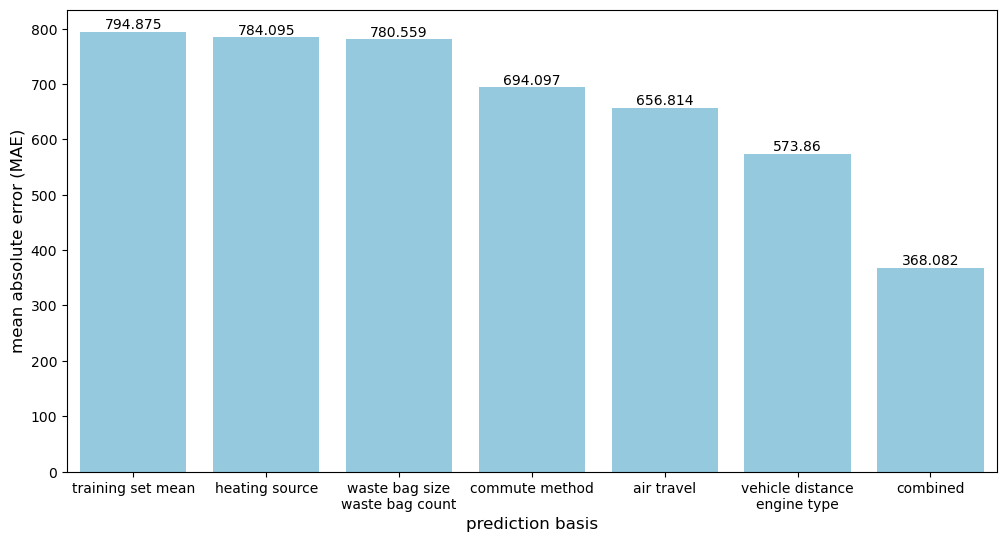

In [8]:
y = [t[0] for t in sorted_data]
x = [t[1] for t in sorted_data]
results = pd.DataFrame({'prediction basis': x, 'mean absolute error': y})
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(results, x='prediction basis', y='mean absolute error', color='skyblue')
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xlabel('prediction basis', fontsize=12)
ax.set_ylabel('mean absolute error (MAE)', fontsize=12)
plt.show()